# Group Description
---
Group 57 (as per sheet available on MS Teams) consists of the following members.

1. Abhranil Chandra - 19MF10002
2. Duhita Wani - 19ME10082
3. Ratnesh Bhosale - 19MF10010
4. Sohan Patnaik - 19ME30051
5. Vishal Anand - 19ME10080

# Code for case 1 and case 2
---
1. Implement a fully connected neural network with one hidden layer in keras/tensorflow. Set the number of neurons in the hidden layer to 100. 
2. Implement a deep neural network with 10 layers and each layer has 10 neurons. Now, compare the performance of this network with previous network.

# Import the required libraries
---

In [ ]:
# Import the required libraries

import numpy as np
import random as rn
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import KFold
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

# Set the seed for all random variables
---

In [ ]:
# Set the seed for the randomly initialised variables

SEED = 42
rn.seed(SEED)
tf.random.set_seed(SEED)
np.random.seed(SEED)

# Load and Preprocess data
---

In [ ]:
# Load train and test dataset

def load_dataset():

        # Load dataset
        (trainX, trainY), (testX, testY) = mnist.load_data()
    
        # Reshape dataset to have a single channel
        trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
        testX = testX.reshape((testX.shape[0], 28, 28, 1))
        
        # One hot encode target values
        trainY = to_categorical(trainY)
        testY = to_categorical(testY)
        
        return trainX, trainY, testX, testY
 
# Scale pixels

def prep_pixels(train, test):

        # Convert from integers to floats
        train_norm = train.astype('float32')
        test_norm = test.astype('float32')
        
        # Normalize to range 0-1
        train_norm = train_norm / 255.0
        test_norm = test_norm / 255.0
        
        # Return normalized images
        return train_norm, test_norm

# Model definition, training and evaluation
---

In [ ]:
# Define cnn model

def create_one_hidden_layer_model():

        model = Sequential()

        # Layer to flatten the grey-scale images into vector form 
        model.add(Flatten())
        
        # Hidden layer with 100 neurons with relu activation
        model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
        
        # Output layer with 10 neurons and softmax activation
        model.add(Dense(10, activation='softmax'))
        
        # Compile model (Stochastic Gradient Descent optimiser)
        optimizer = SGD(learning_rate = 0.01, momentum = 0.9)
        model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

        # Return the compiled model
        return model

def create_ten_hidden_layer_model():

        model = Sequential()

        # Layer to flatten the grey-scale images into vector form 
        model.add(Flatten())
        
        # 10 Hidden layers with 10 neurons with relu activation
        model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
        
        # Output layer with 10 neurons and softmax activation
        model.add(Dense(10, activation='softmax'))
        
        # Compile model (Stochastic Gradient Descent optimiser)
        optimizer = SGD(learning_rate = 0.01, momentum = 0.9)
        model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

        # Return the compiled model
        return model

# Train model

def train_model(dataX, dataY):

        # One hidden layer model
        model_one_hidden_layer = create_one_hidden_layer_model()

        # Train one hidden layer model for 5 epochs 
        print("Training model with one hidden layer for 10 epochs")
        print()
        history_one_hidden_layer = model_one_hidden_layer.fit(dataX, dataY, epochs = 10, validation_split = 0.1,   batch_size = 32, verbose = True)
        print()

        # Accuracy of training set for one hidden layer model
        print("Evaluating model with one hidden layer on training set")
        print()
        _, accuracy_one_hidden_layer = model_one_hidden_layer.evaluate(dataX, dataY, verbose = True)
        print()

        # Ten hidden layers model
        model_ten_hidden_layer = create_ten_hidden_layer_model()

        # Train ten hidden layer model for 10 epochs 
        print("Training model with ten hidden layers for 10 epochs")
        print()
        history_ten_hidden_layer = model_ten_hidden_layer.fit(dataX, dataY, epochs = 10, validation_split = 0.1,   batch_size = 32, verbose = True)
        print()
        
        # Accuracy of training set for one hidden layer model
        print("Evaluating model with ten hidden layer on training set")
        print()
        _, accuracy_ten_hidden_layer = model_ten_hidden_layer.evaluate(dataX, dataY, verbose = True)
        print()
        print()

        # Return the models, histories and the accuracies
        return (model_one_hidden_layer, model_ten_hidden_layer , history_one_hidden_layer, history_ten_hidden_layer), (accuracy_one_hidden_layer, accuracy_ten_hidden_layer)
 
# Function to evaluate model on test set

def evaluate_model(testX, testY, model):

        _, accuracy = model.evaluate(testX, testY, verbose = True)
        return accuracy

def plot_accuracy_per_epoch(history1, history2):

        # Plot the training and validation accuracy for model with one hidden layer
        fig, ax = plt.subplots(1, 2, figsize = (15, 5))
        ax[0].plot(history1.history['accuracy'])
        ax[0].plot(history1.history['val_accuracy'])
        ax[0].set_title("Model accuracy for one hidden layer")
        ax[0].set_xlabel("Number of epochs")
        ax[0].set_ylabel("Accuracy")
        ax[0].legend(['train', 'validation'], loc = 'lower right')

        # Plot the training and validation accuracy for model with ten hidden layer
        ax[1].plot(history2.history['accuracy'])
        ax[1].plot(history2.history['val_accuracy'])
        ax[1].set_title("Model accuracy for ten hidden layers")
        ax[1].set_xlabel("Number of epochs")
        ax[1].set_ylabel("Accuracy")
        ax[1].legend(['train', 'validation'], loc = 'lower right')

        plt.show()

def plot_loss_per_epoch(history1, history2):

        # Plot the training and validation loss for model with one hidden layer
        fig, ax = plt.subplots(1, 2, figsize = (15, 5))
        ax[0].plot(history1.history['loss'])
        ax[0].plot(history1.history['val_loss'])
        ax[0].set_title("Model loss for one hidden layer")
        ax[0].set_xlabel("Number of epochs")
        ax[0].set_ylabel("Loss")
        ax[0].legend(['train', 'validation'], loc = 'lower right')

        # Plot the training and validation loss for model with ten hidden layer
        ax[1].plot(history2.history['loss'])
        ax[1].plot(history2.history['val_loss'])
        ax[1].set_title("Model loss for ten hidden layers")
        ax[1].set_xlabel("Number of epochs")
        ax[1].set_ylabel("Loss")
        ax[1].legend(['train', 'validation'], loc = 'lower right')

        plt.show()        

# Main function with all function calls and evaluation

def main():

        # Load the MNIST dataset
        print()
        trainX, trainY, testX, testY = load_dataset()
        print()

        # Prepare pixel data
        trainX, testX = prep_pixels(trainX, testX)
        
        # Call train function to get trained models
        (model_one_hidden_layer, model_ten_hidden_layer , history_one_hidden_layer, history_ten_hidden_layer), (accuracy_one_hidden_layer, accuracy_ten_hidden_layer) = train_model(trainX, trainY)

        # Calculate accuracies on the test set
        test_accuracy_one_hidden_layer = evaluate_model(testX, testY, model_one_hidden_layer)
        test_accuracy_ten_hidden_layer = evaluate_model(testX, testY, model_ten_hidden_layer)

        print()
        print("Plot loss and accuracy of the training set for both type of models")
        plot_loss_per_epoch(history_one_hidden_layer, history_ten_hidden_layer)        
        plot_accuracy_per_epoch(history_one_hidden_layer, history_ten_hidden_layer)        

        print()
        print("Final results are as follows")
        print()
        print("The training accuracy for model with one hidden layer is {:.5f}".format(accuracy_one_hidden_layer))
        print("The test accuracy for model with one hidden layer is {:.5f}".format(test_accuracy_one_hidden_layer))
        print()
        print("The training accuracy for model with ten hidden layers is {:.5f}".format(accuracy_ten_hidden_layer))
        print("The test accuracy for model with ten hidden layer is {:.5f}".format(test_accuracy_ten_hidden_layer))


11501568/11490434 [==============================] - 0s 0us/step

Training model with one hidden layer for 10 epochs

Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3324 - accuracy: 0.9037 - val_loss: 0.1579 - val_accuracy: 0.9583
Epoch 2/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1605 - accuracy: 0.9533 - val_loss: 0.1219 - val_accuracy: 0.9643
Epoch 3/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1167 - accuracy: 0.9666 - val_loss: 0.0966 - val_accuracy: 0.9728
Epoch 4/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0937 - accuracy: 0.9725 - val_loss: 0.0897 - val_accuracy: 0.9735
Epoch 5/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0778 - accuracy: 0.9772 - val_loss: 0.0803 - val_accuracy: 0.9770
Epoch 6/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0660 - accuracy: 0.9806 - val_loss: 0.0818 - val_accuracy: 0.9772
Epoch 7/10
1688/1

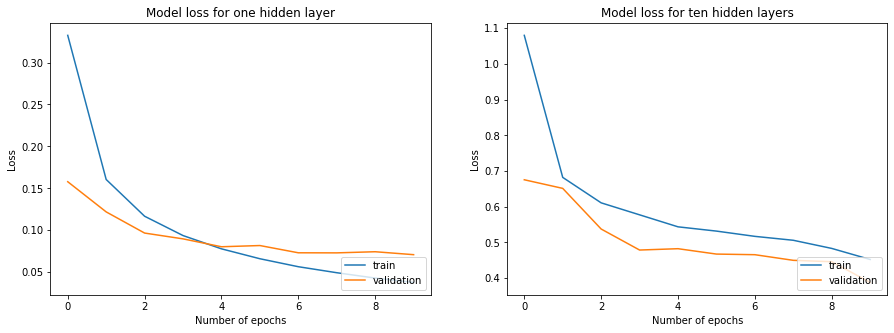

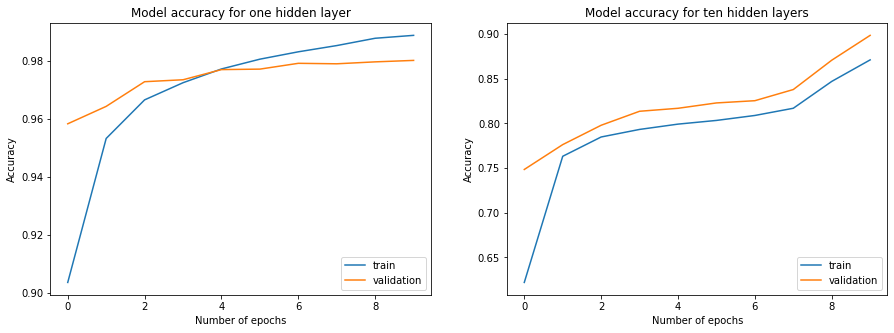


Final results are as follows

The training accuracy for model with one hidden layer is 0.99183
The test accuracy for model with one hidden layer is 0.97700

The training accuracy for model with ten hidden layers is 0.88243
The test accuracy for model with ten hidden layer is 0.88000


In [ ]:
main()

# Analysis of the models
---
As it is clearly visible from the training and test accuracy that the model with one hidden layer with 100 neurons outperforms the model with 10 hidden layers each with 10 neurons. Only one result is shown in the cell, but this experiment was carried several times with different seed setting to make sure that the result is consistent. Though the number of parameters remains same in the model, the shallower network performs better than the deeper network. The reason might be that the shallower network was able to capture the features more extensively in the image. Moreover, as the number of layers increases, the complexity of the model increases, hence leading to overfitting. Therefore, the deeper model fails to generalise better to the test set. 

# Code for case 3
---
3. Write another program that will asses the quality of features generated by the 10 layer deep network in its different layers. For this, train the deep network first. Then generate the features from hidden layers 5, 7 and 10 separately and use it k-nearest neighbor classifier to classify the images and compare the performances of the features generated from layers 5, 7 and 10. The features in a layer mean the activation values of the neurons in that particular layer.

# Import the required libraries
---

In [ ]:
# Import the required libraries

import numpy as np
import random as rn
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import KFold
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score

# Set the seed for all random variables
---

In [ ]:
# Set the seed for the randomly initialised variables

SEED = 42
rn.seed(SEED)
tf.random.set_seed(SEED)
np.random.seed(SEED)

# Load and preprocess data
---

In [ ]:
# Load train and test dataset

def load_dataset():
        
        # Load dataset
        (trainX, trainY), (testX, testY) = mnist.load_data()
    
        # Reshape dataset to have a single channel
        trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
        testX = testX.reshape((testX.shape[0], 28, 28, 1))
        
        # One hot encode target values
        trainY = to_categorical(trainY)
        testY = to_categorical(testY)
        
        return trainX, trainY, testX, testY
 
# Scale pixels

def prep_pixels(train, test):

        # Convert from integers to floats
        train_norm = train.astype('float32')
        test_norm = test.astype('float32')
        
        # Normalize to range 0-1
        train_norm = train_norm / 255.0
        test_norm = test_norm / 255.0
        
        # Return normalized images
        return train_norm, test_norm

# Model definition, training and fitting of KNN
---

In [ ]:
def create_ten_hidden_layer_model():

        model = Sequential()

        # Layer to flatten the grey-scale images into vector form
        model.add(Flatten())
        
        # 10 Hidden layers with 10 neurons with relu activation
        model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
        
        # Output layer with 10 neurons and softmax activation
        model.add(Dense(10, activation='softmax'))
        
        # Compile model (Stochastic Gradient Descent optimiser)
        optimizer = SGD(learning_rate = 0.01, momentum = 0.9)
        model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

        # Return the compiled model
        return model

# Train model

def train_model(dataX, dataY):

        # Ten hidden layers model
        model_ten_hidden_layer = create_ten_hidden_layer_model()

        # Train ten hidden layer model for 10 epochs 
        print("Training model with ten hidden layers for 10 epochs")
        print()
        history_ten_hidden_layer = model_ten_hidden_layer.fit(dataX, dataY, epochs = 10, validation_split = 0.1,   batch_size = 32, verbose = True)
        print()
        
        # Accuracy of training set for one hidden layer model
        print("Evaluating model with ten hidden layer on training set")
        print()
        _, accuracy_ten_hidden_layer = model_ten_hidden_layer.evaluate(dataX, dataY, verbose = True)
        print()
        print()

        # Return the models, histories and the accuracies
        return model_ten_hidden_layer, history_ten_hidden_layer, accuracy_ten_hidden_layer

def k_nearest_neighbors_classifier(trainX, trainY, testX, testY):

        knn = KNeighborsClassifier()
        knn.fit(trainX, trainY)
        
        train_predY = knn.predict(trainX)
        train_accuracy = accuracy_score(train_predY, trainY)

        test_predY = knn.predict(testX)
        test_accuracy = accuracy_score(test_predY, testY)    
        
        return train_accuracy, test_accuracy

def main():

        print()
        # Load the MNIST dataset
        trainX, trainY, testX, testY = load_dataset()
        print()

        # Prepare pixel data
        trainX, testX = prep_pixels(trainX, testX)
        
        # Call train function to get trained models
        model_ten_hidden_layer, history_ten_hidden_layer, accuracy_ten_hidden_layer = train_model(trainX, trainY)

        # Define list of feature extraction layers
        feature_extraction_layers = [5, 7, 10]

        # Fit KNN model for each of the mentioned layers and report training and test accuray
        print("Fitting and evaluating KNN model")
        print()
        for i, layer in enumerate(model_ten_hidden_layer.layers):
                
                if ((i+1) in feature_extraction_layers):
                        
                        func = K.function([model_ten_hidden_layer.get_layer(index = 0).input], layer.output)
                        trainX_features = func([trainX])  
                        testX_features = func([testX])  

                        train_accuracy, test_accuracy = k_nearest_neighbors_classifier(trainX_features, trainY, testX_features, testY)

                        print("For {}th layer features, training accuracy: {:.5f}, test accuracy: {:.5f}".format(i+1, train_accuracy, test_accuracy))

In [ ]:
main()


11501568/11490434 [==============================] - 0s 0us/step

Training model with ten hidden layers for 10 epochs

Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.9548 - accuracy: 0.6627 - val_loss: 0.5991 - val_accuracy: 0.8298
Epoch 2/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.5823 - accuracy: 0.8359 - val_loss: 0.4178 - val_accuracy: 0.8943
Epoch 3/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.5008 - accuracy: 0.8657 - val_loss: 0.4031 - val_accuracy: 0.8905
Epoch 4/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4205 - accuracy: 0.8869 - val_loss: 0.3419 - val_accuracy: 0.9090
Epoch 5/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3988 - accuracy: 0.8933 - val_loss: 0.3433 - val_accuracy: 0.9113
Epoch 6/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3794 - accuracy: 0.8981 - val_loss: 0.3220 - val_accuracy: 0.9180
Epoch 7/10
1688/

# Analysis of features extracted from different layers
---
As it can be seen from both the training and test set accuracy, the features extracted from layer 5 performs better than that of layer 7 which again performs better than that of layer 10. The reason for this may be attributed to the fact that as the we go deep into the network, the activation do not give a generalised feature representation of the input image. The features tend to be a representation responsible for giving correct output for that particular case. So, the layer in the middle performs better. 